In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/content/retail_sales_dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Understanding Dataset

In [ ]:
df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
df.describe(include='object')

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351


In [ ]:
df.duplicated().sum()

0

EDA

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Days'] = df['Date'].dt.day_name()
df['MonthDate'] = df['Date'].dt.day
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Days,MonthDate
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,2023,Friday,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,2023,Monday,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,2023,Friday,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,Sunday,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,Saturday,6


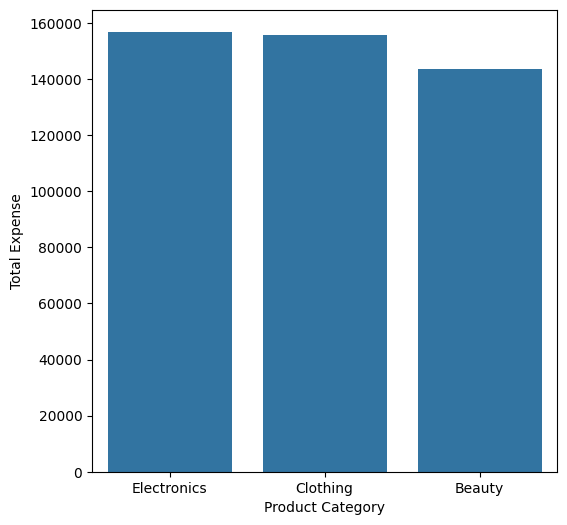

In [ ]:
group1 = df.groupby(['Product Category'])['Total Amount'].sum().reset_index().sort_values(by='Total Amount',ascending=False)

plt.figure(figsize=(6,6))
sns.barplot(data=group1, x='Product Category', y='Total Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Expense')
plt.show()

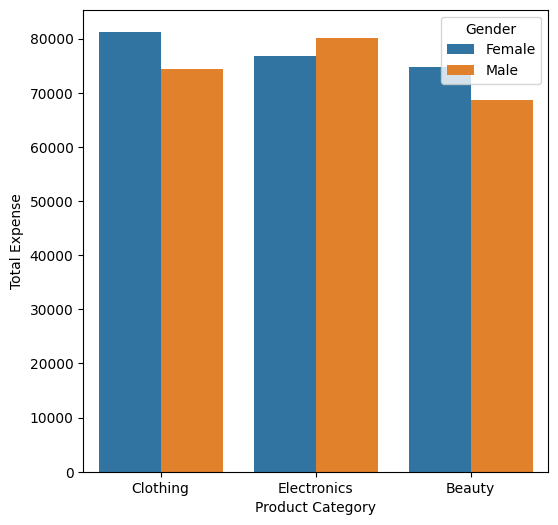

In [ ]:
group2 = df.groupby(['Product Category','Gender'])['Total Amount'].sum().reset_index().sort_values(by='Total Amount',ascending=False)

plt.figure(figsize=(6,6))
sns.barplot(data=group2,x='Product Category',y='Total Amount',hue='Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Expense')
plt.show()

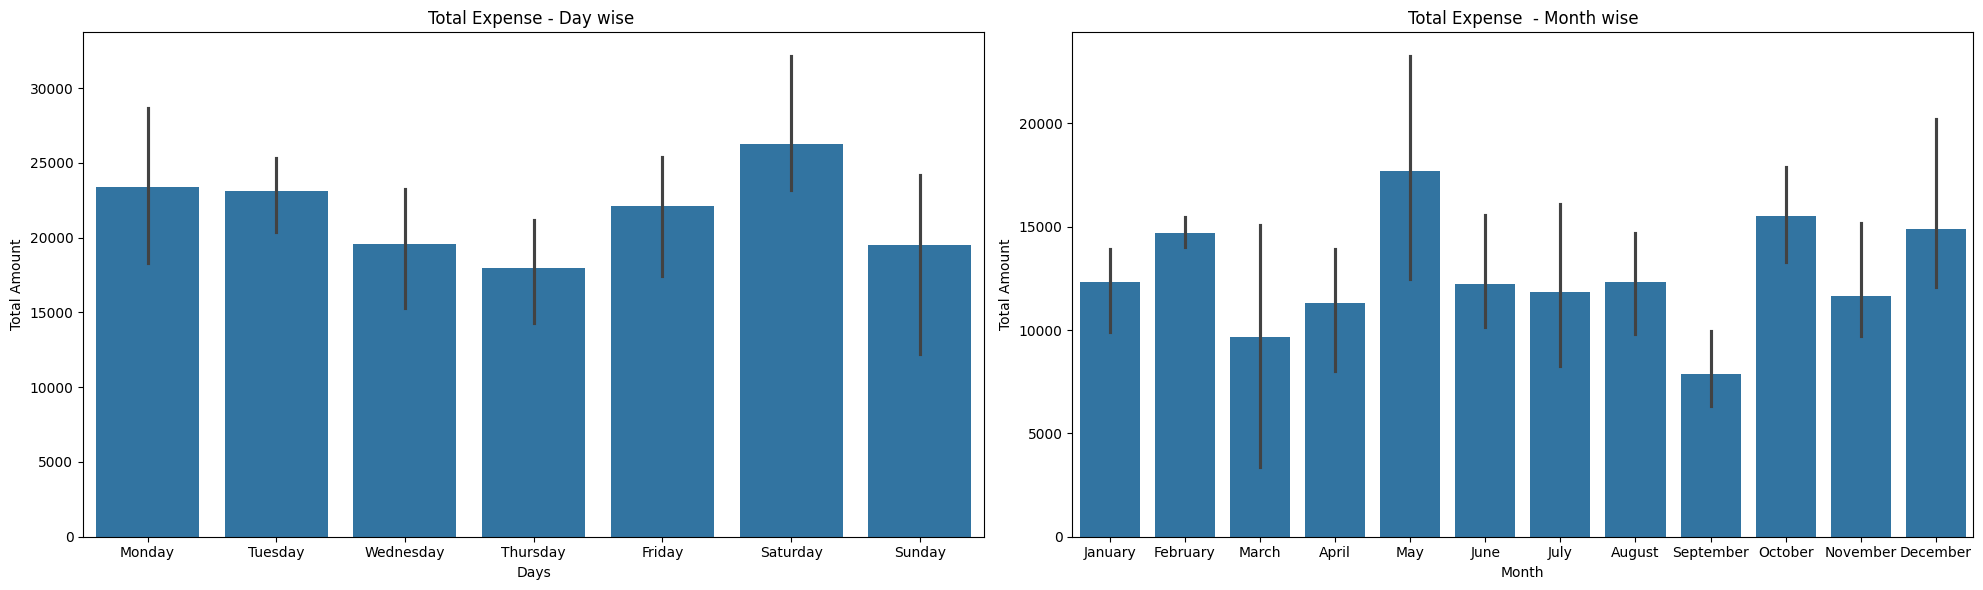

In [ ]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'],categories=month_order,ordered=True) #Bring months and days in chronological order

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Days'] = pd.Categorical(df['Days'],categories=day_order,ordered=True)

group3 = df.groupby(['Days','Product Category'])['Total Amount'].sum().reset_index().sort_values(by='Total Amount',ascending=False)
group4 = df.groupby(['Month','Product Category'])['Total Amount'].sum().reset_index().sort_values(by='Total Amount',ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,6))

sns.barplot(data=group3, x='Days', y='Total Amount',ax=axes[0])
axes[0].set_title('Total Expense - Day wise ')

sns.barplot(data=group4, x='Month', y='Total Amount',ax=axes[1])
axes[1].set_title('Total Expense  - Month wise')
plt.tight_layout()
plt.show()

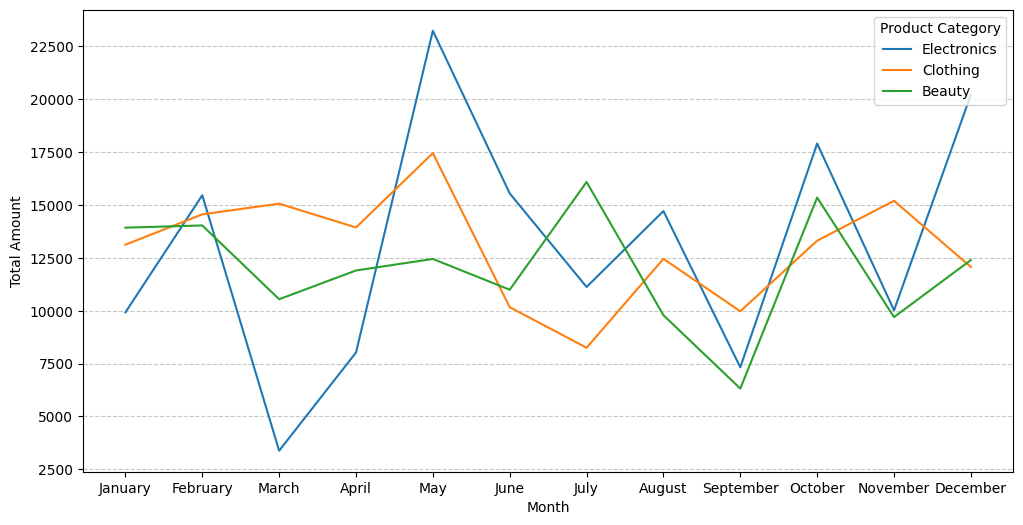

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=group4, y='Total Amount',x='Month',hue='Product Category')
plt.title='Monthly Sales by Product'
plt.legend(title='Product Category', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

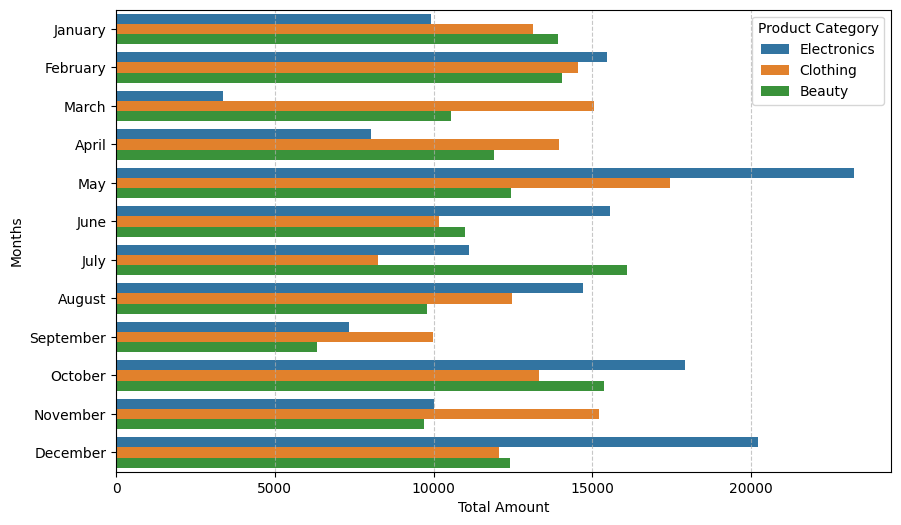

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=group4, x='Total Amount',y='Month',hue='Product Category')
plt.xlabel('Total Amount')
plt.ylabel('Months')
plt.legend(title='Product Category', loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
bins=[18,30,40,50,60,70]
label = ['18-29','30-39','40-49','50-59','60+']
df['age_group'] = pd.cut(df['Age'],labels=label,bins=bins)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Days,MonthDate,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,2023,Friday,24,30-39
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,2023,Monday,27,18-29
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,2023,Friday,13,40-49
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,Sunday,21,30-39
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,Saturday,6,18-29


In [ ]:
bins=[18,30,40,50,60,70]
label = ['18-29','30-39','40-49','50-59','60+']
df['age_group'] = pd.cut(df['Age'],labels=label,bins=bins)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Days,MonthDate,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,2023,Friday,24,30-39
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,2023,Monday,27,18-29
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,2023,Friday,13,40-49
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,Sunday,21,30-39
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,Saturday,6,18-29


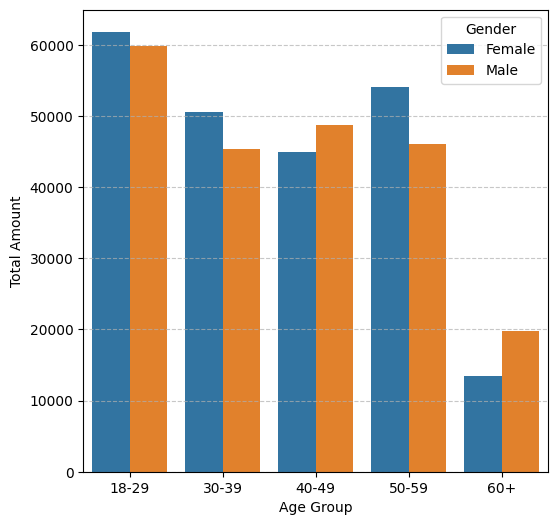

In [ ]:
group5 = df.groupby(['age_group','Gender'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(data=group5,x='age_group',y='Total Amount',hue='Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

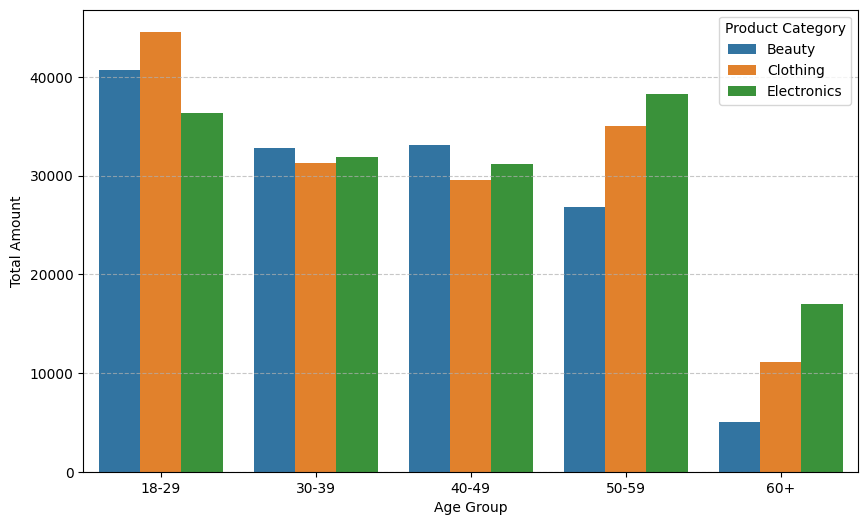

In [ ]:
group6=df.groupby(['age_group','Product Category'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=group6,x='age_group',y='Total Amount',hue='Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.legend(title='Product Category', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

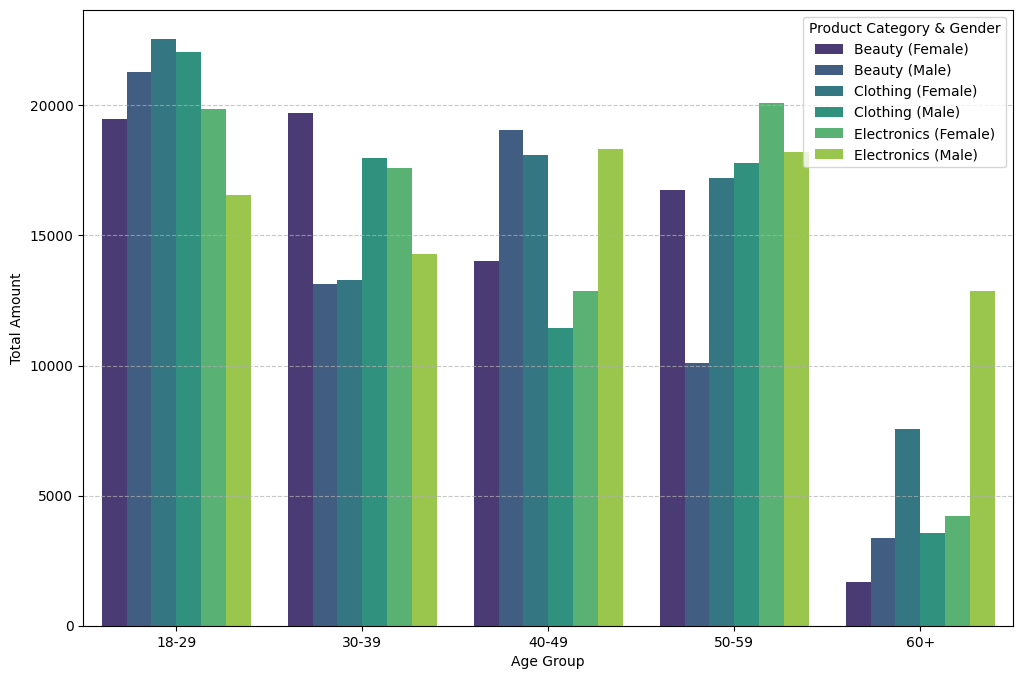

In [ ]:
group7=df.groupby(['age_group', 'Product Category', 'Gender'])['Total Amount'].sum().reset_index()
group7['Product_Gender'] = group7['Product Category'] + ' (' + group7['Gender'] + ')'

plt.figure(figsize=(12, 8))
sns.barplot(data=group7, x='age_group', y='Total Amount', hue='Product_Gender',palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.legend(title='Product Category & Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Correlations and Regression

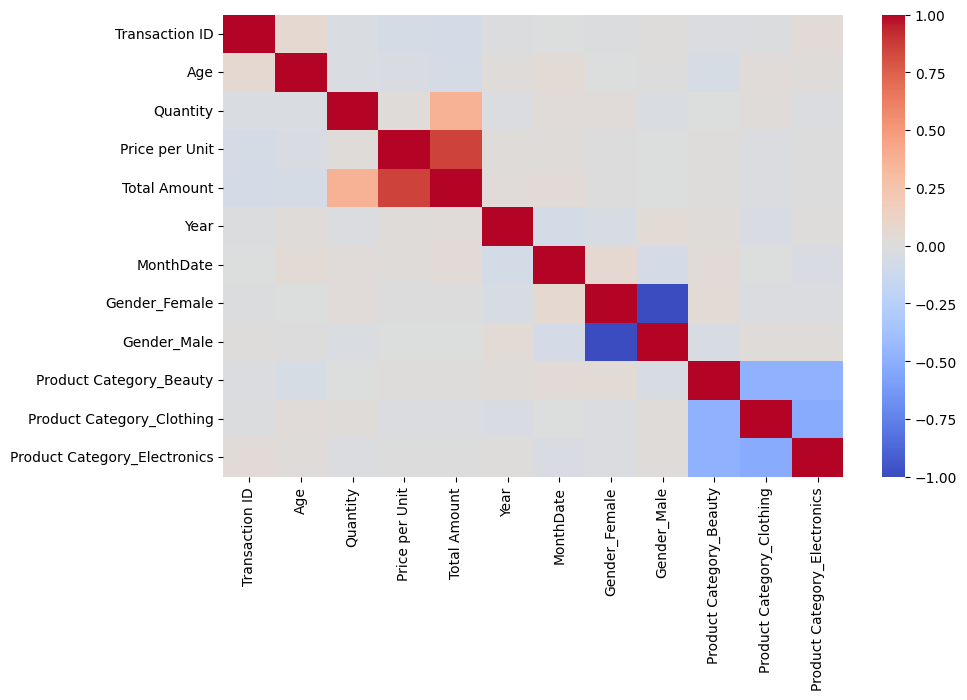

In [ ]:
df_dummies = pd.get_dummies(data=df,columns=['Gender','Product Category'])

plt.figure(figsize=(10,6))
sns.heatmap(df_dummies.corr(numeric_only=True),cmap='coolwarm')
plt.show()

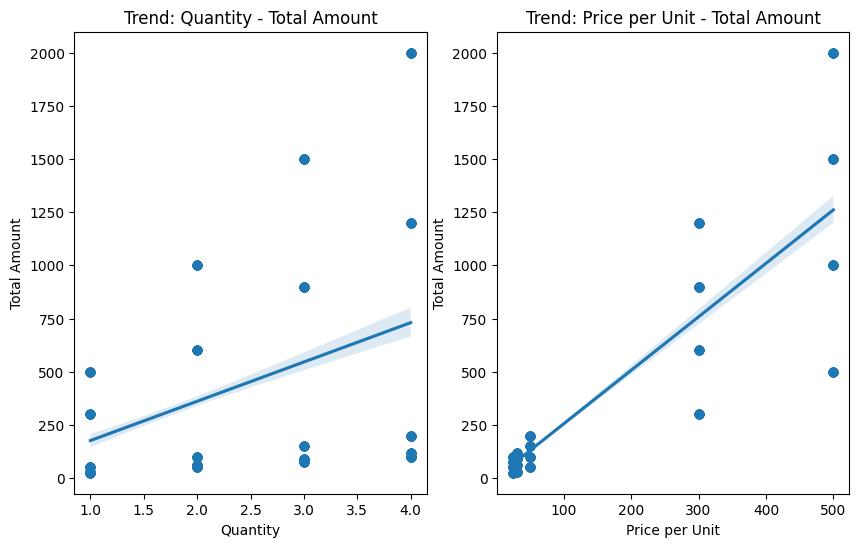

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.regplot(data=df,x='Quantity',y='Total Amount',ax=axes[0])
axes[0].set_title('Trend: Quantity - Total Amount')

sns.regplot(data=df, x='Price per Unit',y='Total Amount',ax=axes[1])
axes[1].set_title('Trend: Price per Unit - Total Amount')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y = df_dummies['Total Amount']
X = df_dummies[['Age','Quantity','Price per Unit','Gender_Female', 'Gender_Male', 'Product Category_Beauty',
       'Product Category_Clothing', 'Product Category_Electronics']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Intercept: -400.14552368580746
Coefficients: [ -0.90510341 179.61734948   2.48599053  -5.78104945   5.78104945
   0.38010348  -4.69382898   4.3137255 ]
Mean Squared Error: 41883.99204291323
R^2 Score: 0.8569189755192648


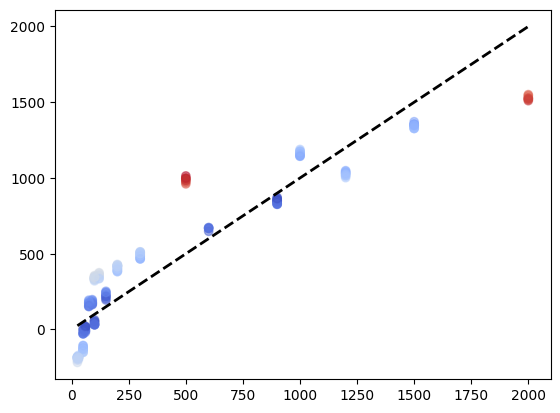

In [ ]:
plt.scatter(y_test, y_pred,c=abs(y_test - y_pred) ,cmap='coolwarm', label='Error Magnitude',alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'k--',
    lw=2,
    label='Perfect Prediction'
)
plt.title=('Actual vs. Predicted Total Amount')
plt.show()